In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP
import HDF5

In [2]:
include("../model-41/likelihood.jl")
include("../model-41/utill_model.jl")
include("../utill.jl")

plot_projections_prl (generic function with 1 method)

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [4]:
function hist_2d(smpls, dim_1, dim_2; nbins=40, axmin = true, axmax=true)
    smpl_tmp, smpl_w = flatview(unshaped.(smpls.v)), smpls.weight
    if axmin == true
        hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
    else
       hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), (range(axmin[1], stop=axmax[1], length=nbins), range(axmin[2], stop=axmax[2], length=nbins))) 
    end
    hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

hist_2d (generic function with 1 method)

In [5]:
β1 = 0.015
β2 = 0.0077 # (0.8/30/sqrt(12))
β3 = 0.0058 # (0.8/40/sqrt(12))

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), truncated(Normal(4.0, 2.0), 1.0, 8.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.35 .. 1.0, 
        waist = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        waist_2 = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.47799, 15.025999, 23.1644],
); 

labels = [ 
    L"\sigma_{h,x}", 
    L"\sigma_{h,y}",
    L"\sigma_{c,x}", 
    L"\sigma_{c,y}",
    L"\sigma'_{h,x}", 
    L"\sigma'_{h,y}",
    L"\sigma'_{c,x}", 
    L"\sigma'_{c,y}",  
    L"\alpha",
    L"s_{w,h}",
    L"s_{w,c}",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

In [6]:
FPATH = "../../data/sampling_results/Benchmark-5/"

"../../data/sampling_results/Benchmark-5/"

In [7]:
readdir(FPATH)

676-element Vector{String}:
 ".ipynb_checkpoints"
 "classific_res.jld2"
 "hc-1.hdf5"
 "hc-10.hdf5"
 "hc-100.hdf5"
 "hc-103.hdf5"
 "hc-104.hdf5"
 "hc-105.hdf5"
 "hc-106.hdf5"
 "hc-109.hdf5"
 "hc-11.hdf5"
 "hc-110.hdf5"
 "hc-111.hdf5"
 ⋮
 "lc-90.hdf5"
 "lc-91.hdf5"
 "lc-92.hdf5"
 "lc-93.hdf5"
 "lc-94.hdf5"
 "lc-95.hdf5"
 "lc-96.hdf5"
 "lc-97.hdf5"
 "lc-98.hdf5"
 "lc-99.hdf5"
 "mcmc-summary-data.jld"
 "tmp-to-delete"

In [8]:
# Plots: "lc-52.hdf5"  "hc-90.hdf5"

fname = "lc-52.hdf5"  #readdir(FPATH)[8]
smpl_tmp = bat_read(FPATH*fname).result
samples = varshape(prior).(smpl_tmp);

In [9]:
fname

# Example HC "hc-2.hdf5"
# Example LC "lc-169.hdf5"

"lc-52.hdf5"

In [10]:
smpl_vect = mode(samples)[1]

(tr_size = [0.06783298607275098, 0.11587913982824626], tr_size_2 = [0.09626352950269777, 0.10484112809185558], ang_spr = [6.257040112879319, 5.65836214973152], ang_spr_2 = [2.2728973065465237, 2.0248608095939487], mixt_pow = 0.592864913707373, waist = [3.057453533311182], waist_2 = [2.735668952430159], algmx = [33.31317629583365, 33.877985402830674, 21.182810513330555, 35.4675880205982], algmy = [36.22592959937697, 36.73589802449278, 20.71259329049064, 34.39276648631309], cam4_ped = 19.310004072169743, cam4_light_fluct = 1.3626699455098241, cam4_light_amp = 2.7793090961322626, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.299310167251558, cam4_resy = 4.091319578492107, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [3.055455154574019, 3.9223933885246267, 2.577860525092769], s_cam = [0.0, 1.47799, 15.025999, 23.1644])

In [11]:
bat_eff_sample_size(samples).result

ShapedAsNT((tr_size = [3999.8408498647836, 4475.895759111322], tr_size_2 = [4772.472266935968, 5064.865243484416], ang_spr = [5418.337541316628, 4936.964999991352], ang_spr_2 = [5876.38243231127, 6444.048706807452], mixt_pow = 5072.10021610506, waist = [3644.5615142322094], waist_2 = [3973.896438637664], algmx = [3950.0913390186074, 4065.947178537642, 4004.5331071654214, 4413.133161660798], algmy = [4174.855316193275, 4357.002511554214, 4536.221050186346, 4285.218756108031], cam4_ped = 4191.642320190934, cam4_light_fluct = 4733.934036158492, cam4_light_amp = 4384.835225863458, resx = 3-element Fill{Int64}: entries equal to 552942, resy = 3-element Fill{Int64}: entries equal to 552942, cam4_resx = 6340.34381518845, cam4_resy = 5731.105760601464, psx = 3-element Fill{Int64}: entries equal to 552942, psy = 3-element Fill{Int64}: entries equal to 552942, cam4_psx = 0-dimensional Fill{Int64}: entries equal to 552942, cam4_psy = 0-dimensional Fill{Int64}: entries equal to 552942, light_amp =

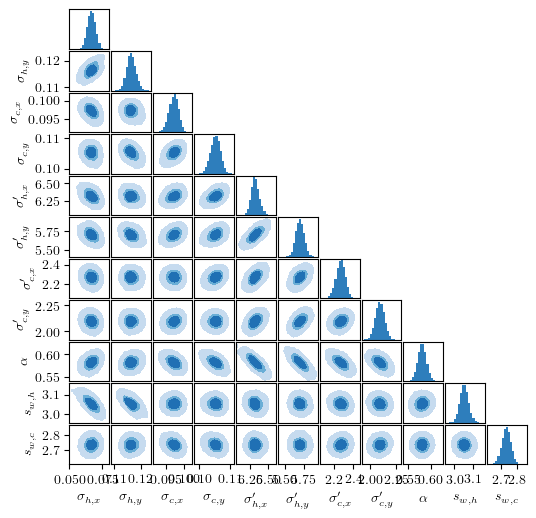

In [12]:
dims = [1,2,3,4,5,6,7,8,9,10, 11]
names = labels[dims]
levels = [0.0001, 0.65, 0.9, 0.95,  1,]
# levels = [0.001, 0.65, 0.95, 1,]
figsize = (5.905631659056317, 5.905631659056317)  #(12,12)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

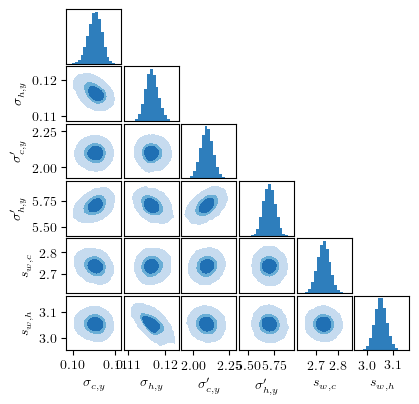

In [13]:
# dims = [3,1,7,5,11,10]
dims = [4,2,8,6,11,10]
names = labels[dims]
levels = [0.1, 0.65, 0.9, 0.95,  1,]
# levels = [0.001, 0.65, 0.95, 1,]
figsize = (4.429223744292238, 4.429223744292238) #(12,12)
n_bins = 20
filename = "../../plots/cont-m2.pdf"

corner_plots(samples, dims, names, levels_quantiles = levels, 
    figsize=figsize, 
    N_bins=n_bins, 
    saveplot = true, 
    filename=filename)

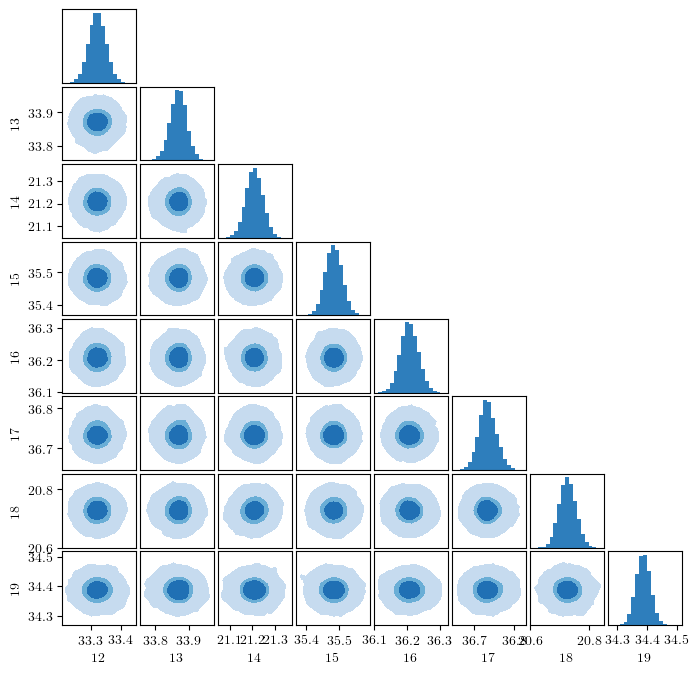

In [14]:
dims = 12:19
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

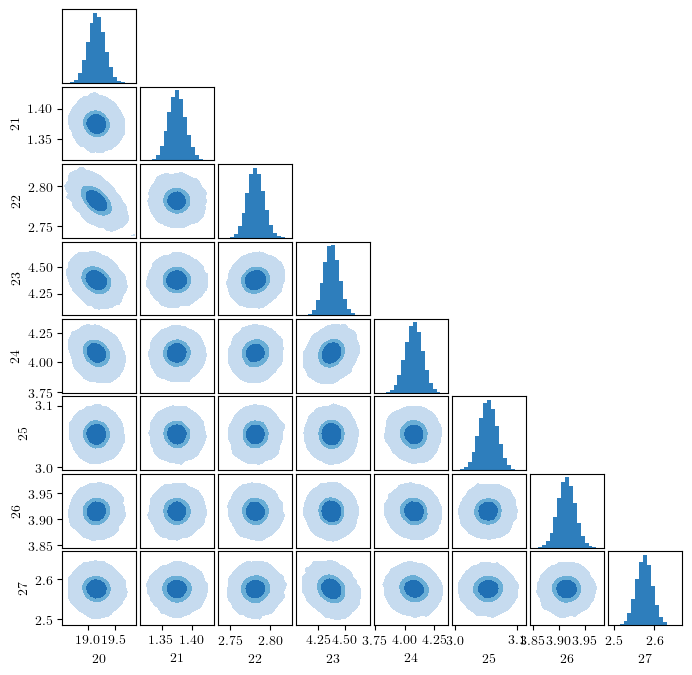

In [15]:
dims = 20:27
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

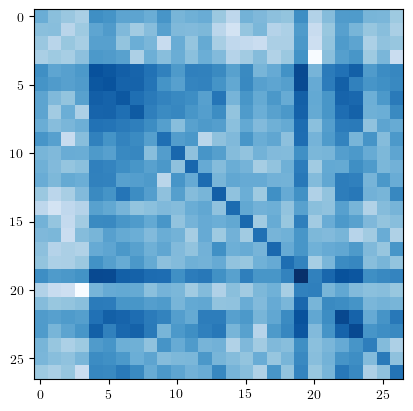

PyObject <matplotlib.image.AxesImage object at 0x7f0b99b98970>

In [16]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

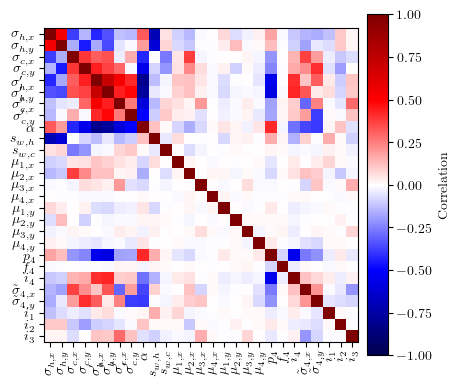

27-element Vector{PyCall.PyObject}:
 PyObject Text(0, 0, '$\\sigma_{h,x}$')
 PyObject Text(1, 0, '$\\sigma_{h,y}$')
 PyObject Text(2, 0, '$\\sigma_{c,x}$')
 PyObject Text(3, 0, '$\\sigma_{c,y}$')
 PyObject Text(4, 0, "$\\sigma'_{h,x}$")
 PyObject Text(5, 0, "$\\sigma'_{h,y}$")
 PyObject Text(6, 0, "$\\sigma'_{c,x}$")
 PyObject Text(7, 0, "$\\sigma'_{c,y}$")
 PyObject Text(8, 0, '$\\alpha$')
 PyObject Text(9, 0, '$s_{w,h}$')
 PyObject Text(10, 0, '$s_{w,c}$')
 PyObject Text(11, 0, '$\\mu_{1,x}$')
 PyObject Text(12, 0, '$\\mu_{2,x}$')
 ⋮
 PyObject Text(15, 0, '$\\mu_{1,y}$')
 PyObject Text(16, 0, '$\\mu_{2,y}$')
 PyObject Text(17, 0, '$\\mu_{3,y}$')
 PyObject Text(18, 0, '$\\mu_{4,y}$')
 PyObject Text(19, 0, '$p_4$')
 PyObject Text(20, 0, '$f_4$')
 PyObject Text(21, 0, '$i_4$')
 PyObject Text(22, 0, '$\\tilde{\\sigma}_{4,x}$')
 PyObject Text(23, 0, '$\\tilde{\\sigma}_{4,y}$')
 PyObject Text(24, 0, '$i_1$')
 PyObject Text(25, 0, '$i_2$')
 PyObject Text(26, 0, '$i_3$')

In [17]:
# SMALL_SIZE = 9
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 10

# # plt.rc("font", family="serif",) #serif="Times"
# # plt.rc("font", family= "Times New Roman")
# plt.rc("font", family="serif", serif="Computer Modern")
# plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
# plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc("text", usetex=true)

dt_reg = flatview(unshaped.(samples.v))
dt_reg = dt_reg .- mean(dt_reg, dims=2)
dt_reg = dt_reg ./ std(dt_reg, dims=2)

dt_reg = cov(dt_reg')
max = maximum(abs.(dt_reg))

figsize = (4.429223744292238, 4.429223744292238)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=figsize, gridspec_kw=Dict("width_ratios"=>[15,1]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

maxval = maximum(abs.(dt_reg))
cb = ax1.imshow(dt_reg,  origin="upper", cmap="seismic", vmin=-maxval, vmax=maxval, aspect="equal") 
fig.colorbar(cb, spacing="proportional", label="Correlation", cax=ax2)

ax1.set_yticks(0:size(labels, 1)-1)
ax1.set_yticklabels(labels)

ax1.set_xticks(0:size(labels, 1)-1)
ax1.set_xticklabels(labels, rotation = 90)

# fig.savefig("../../plots/cor-event.pdf", bbox_inches = "tight")

In [18]:
if fname[1:2] == "hc"
    
    conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m2/images-satur.jld2")
    event_number = parse(Int64, fname[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
    
    images = load("../../data/experiment/dataset_2/m2/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
end

In [19]:
if fname[1:2] == "lc"
    @show "true"
    conv_mat = load("../../data/experiment/dataset_2/m1/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m1/images-satur.jld2")
    event_number = parse(Int64, fname[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    )
    
    images = load("../../data/experiment/dataset_2/m1/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );

end

"true" = "true"


(cam_1 = [0.0 1.0 … 14.0 5.0; 4.0 7.0 … 3.0 0.0; … ; 0.0 0.0 … 142.0 3.0; 316.0 71.0 … 2.0 0.0], cam_2 = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], cam_3 = [117.0 46.0 … 21.0 160.0; 64.0 163.0 … 5.0 35.0; … ; 140.0 100.0 … 414.0 20.0; 11.0 215.0 … 0.0 0.0], cam_4 = [18.0 17.0 … 21.0 13.0; 13.0 9.0 … 19.0 19.0; … ; 13.0 16.0 … 20.0 17.0; 15.0 14.0 … 14.0 19.0], population = 9.075499534606934)

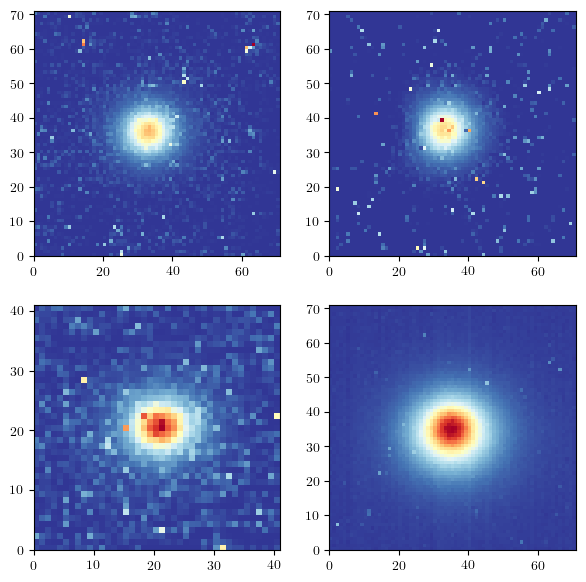

PyObject <matplotlib.collections.QuadMesh object at 0x7f0b99c7b100>

In [29]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event_nt.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event_nt.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event_nt.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event_nt.cam_4, cmap="RdYlBu_r")

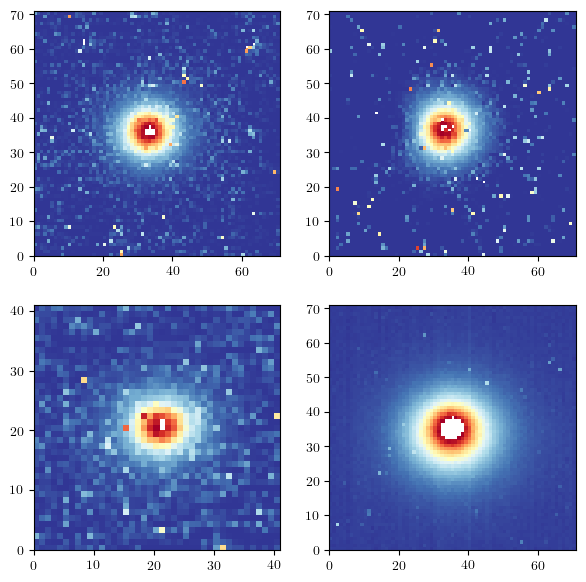

PyObject <matplotlib.collections.QuadMesh object at 0x7f0b9abe1be0>

In [28]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

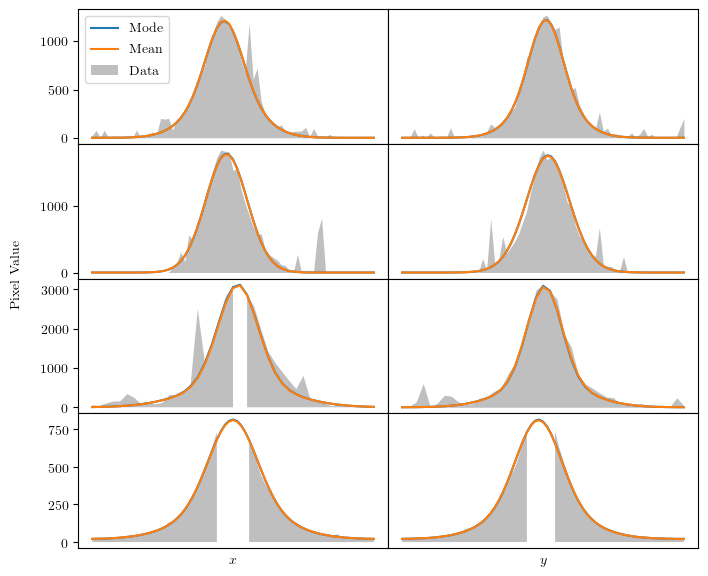

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


PyObject Text(0.04, 0.5, 'Pixel Value')

In [21]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

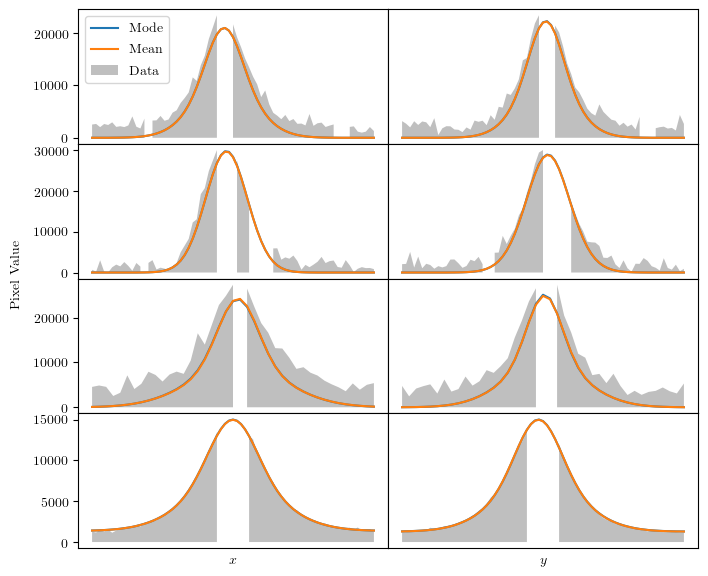

PyObject Text(0.04, 0.5, 'Pixel Value')

In [22]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

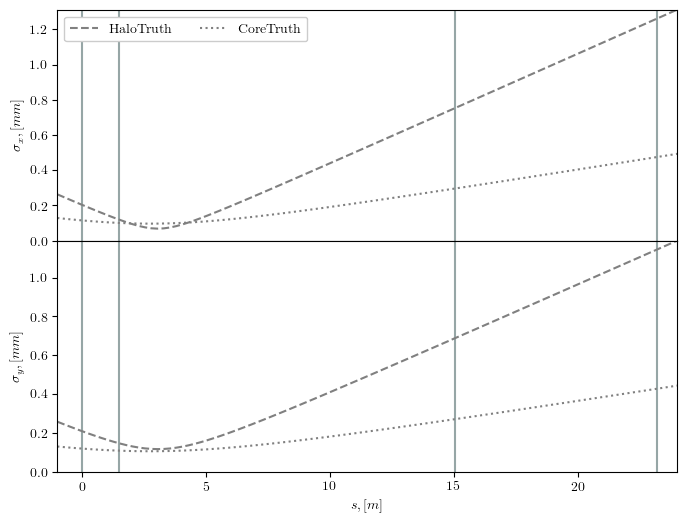

PyObject Text(0.5, 23.83700013837, '$s, [m]$')

In [23]:
params_array = [mode(samples)[1],]
colors_array = ["gray",]
labels_array = ["Truth", ]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)

In [24]:
# plot_projections(conv_matrices, event_nt, event_nt, params_array[1], isnontr = true)

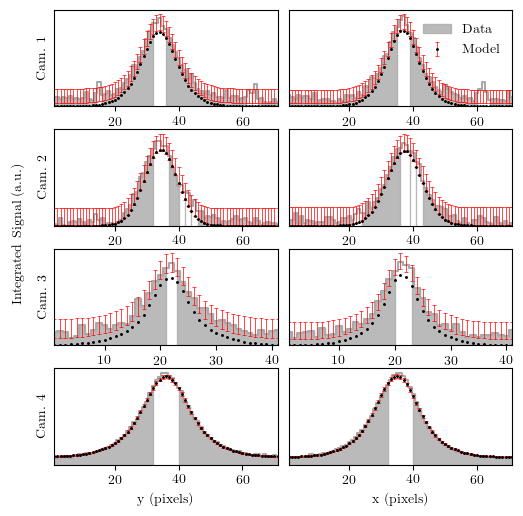

In [27]:
plot_projections(conv_matrices, event, event_nt, params_array[1], 
    isnontr = true, 
    figsize=(5.905631659056317, 5.905631659056317),
    saveplot = false,
)

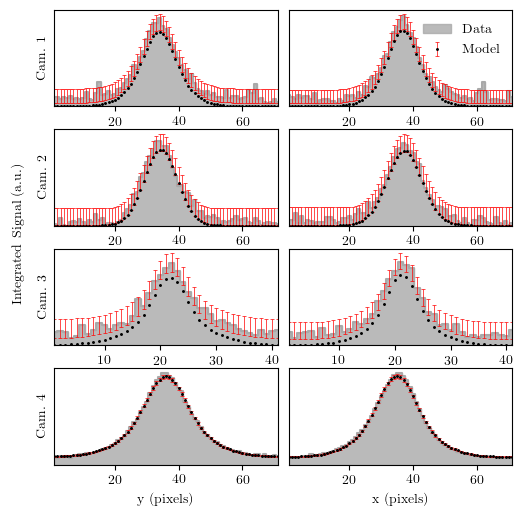

In [25]:
plot_projections(conv_matrices, event_nt, event_nt, params_array[1], 
    isnontr = true, 
    figsize=(5.905631659056317, 5.905631659056317),
    saveplot = true,
    filename = "../../plots/proj-m2-1.pdf"
)

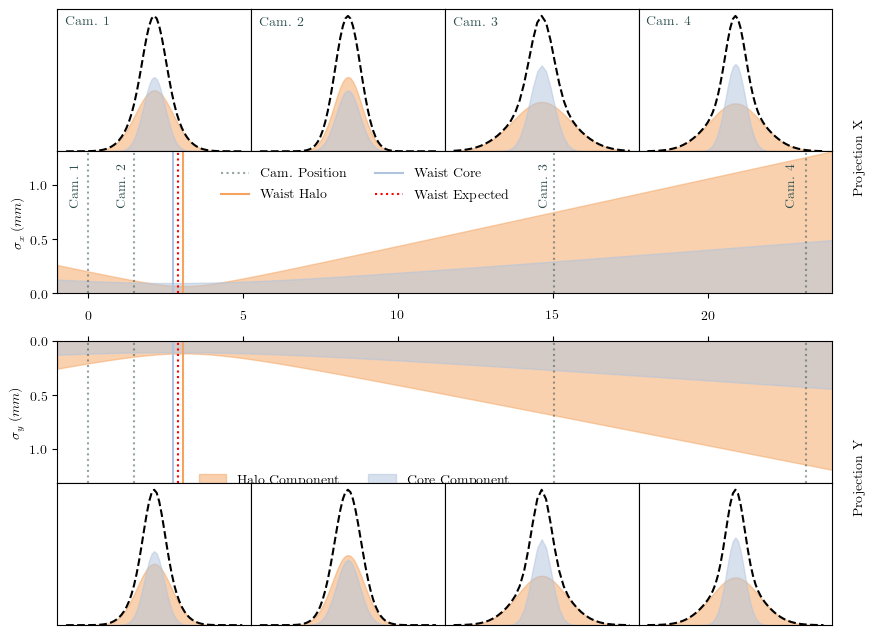

(0.0, 0.07384778521721659)

In [26]:
plot_signal_envelope(params_array[1])

In [ ]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [ ]:
plot_projections_prl(conv_matrices, event_nt, event_nt, params_array[1], 
    isnontr = true, 
    figsize=(2*3.375, 3.375),
    saveplot = true,
    filename = "../../plots-prl/proj-m2-1.pdf"
)